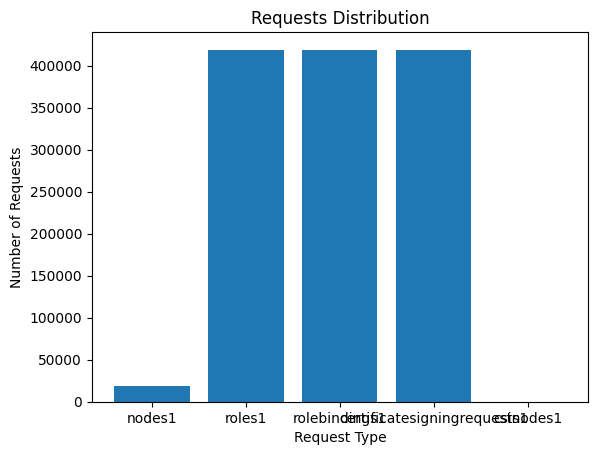

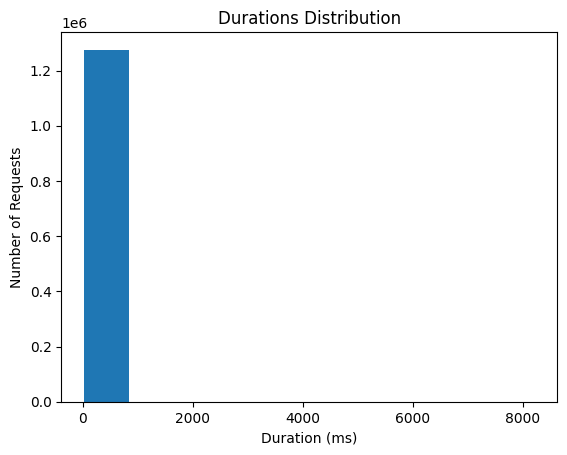

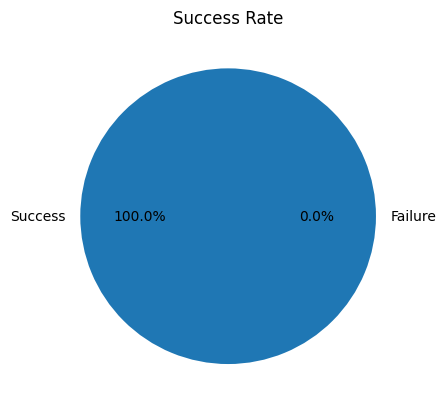

In [5]:
import json
import pandas as pd

import matplotlib.pyplot as plt

with open('../data_training/dataSet_1/requests') as f:
    data = f.readlines()

requests = {}
durations = []
status_codes = []

for line in data:
    request = json.loads(line)
    meta_key = request['metaKey']
    duration = request['durationsInMs']
    status_code = request['statusCode']

    if meta_key not in requests:
        requests[meta_key] = 0
    requests[meta_key] += 1

    durations.append(duration)
    status_codes.append(status_code)

# Plot requests distribution
plt.bar(requests.keys(), requests.values())
plt.title('Requests Distribution')
plt.xlabel('Request Type')
plt.ylabel('Number of Requests')
plt.show()

# Plot durations distribution
plt.hist(durations, bins=10)
plt.title('Durations Distribution')
plt.xlabel('Duration (ms)')
plt.ylabel('Number of Requests')
plt.show()

# Plot success rate
success_rate = status_codes.count(200) / len(status_codes) * 100
plt.pie([success_rate, 100 - success_rate], labels=['Success', 'Failure'], autopct='%1.1f%%')
plt.title('Success Rate')
plt.show()


数据集1 的时间分布（小时级）

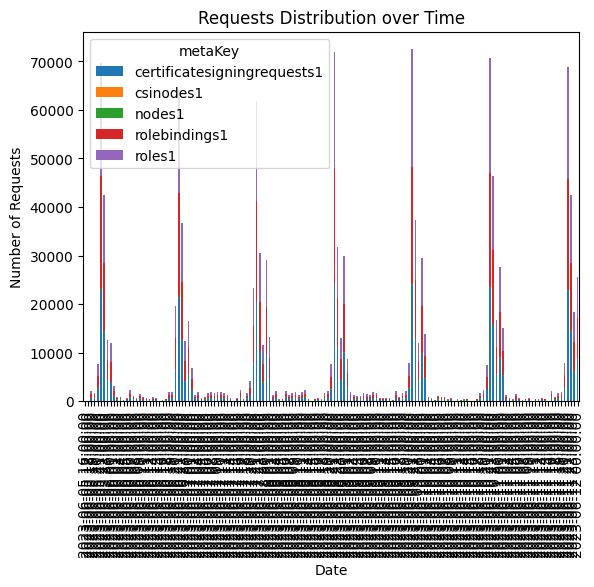

In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('../data_training/dataSet_1/requests') as f:
    data = f.readlines()

requests = []
for line in data:
    request = json.loads(line)
    requests.append(request)

df = pd.DataFrame(requests)

# Convert start time to datetime
df['startTime'] = pd.to_datetime(df['startTime'], unit='ms')

# Group by metaKey and startTime
grouped = df.groupby(['metaKey', pd.Grouper(key='startTime', freq='H')])

# Count number of requests in each group
counts = grouped.size().unstack('metaKey')

# Plot requests distribution over time
counts.plot(kind='bar', stacked=True)
plt.title('Requests Distribution over Time')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.show()


数据集二的时间分布(天级)


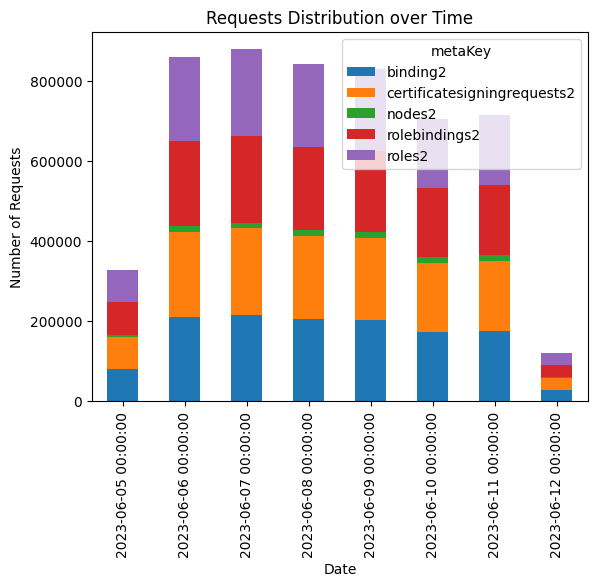

In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('../data_training/dataSet_2/requests') as f:
    data = f.readlines()

requests = []
for line in data:
    request = json.loads(line)
    requests.append(request)

df = pd.DataFrame(requests)

# Convert start time to datetime
df['startTime'] = pd.to_datetime(df['startTime'], unit='ms')

# Group by metaKey and startTime
grouped = df.groupby(['metaKey', pd.Grouper(key='startTime', freq='D')])

# Count number of requests in each group
counts = grouped.size().unstack('metaKey')

# Plot requests distribution over time
counts.plot(kind='bar', stacked=True)
plt.title('Requests Distribution over Time')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.show()


数据集3的时间类型分布

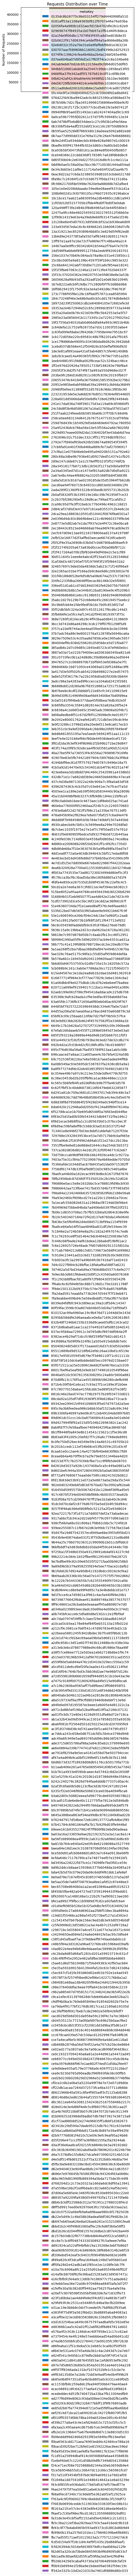

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('../data_training/dataSet_3/requests') as f:
    data = f.readlines()

requests = []
for line in data:
    request = json.loads(line)
    requests.append(request)

df = pd.DataFrame(requests)

# Convert start time to datetime
df['startTime'] = pd.to_datetime(df['startTime'], unit='ms')

# Group by metaKey and startTime
grouped = df.groupby(['metaKey', pd.Grouper(key='startTime', freq='M')])

# Count number of requests in each group
counts = grouped.size().unstack('metaKey')

# Plot requests distribution over time
counts.plot(kind='bar', stacked=True)
plt.title('Requests Distribution over Time')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.show()


数据集3比较怪，不好区分类型，直接看qps，秒级

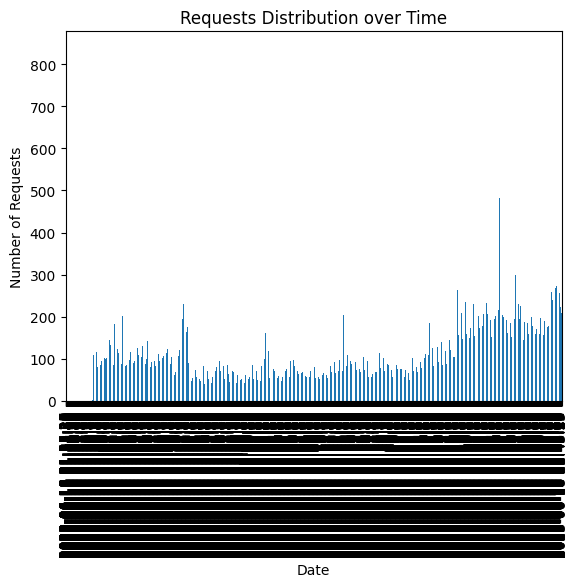

In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('../data_training/dataSet_3/requests') as f:
    data = f.readlines()

requests = []
for line in data:
    request = json.loads(line)
    requests.append(request)

df = pd.DataFrame(requests)

# Convert start time to datetime
df['startTime'] = pd.to_datetime(df['startTime'], unit='ms')
# Group by startTime
grouped = df.groupby(pd.Grouper(key='startTime', freq='S'))

# Count number of requests in each group
counts = grouped.size()

# Plot requests distribution over time
counts.plot(kind='bar')
plt.title('Requests Distribution over Time')
plt.xlabel('Date')
plt.ylabel('Number of Requests')
plt.show()

